Tuomo Salo

<h3> Executive summary:</h3>
The launch of Express Pool has raised questions whether to implement a five minute waiting period before matching the customer with a driver. The waiting period would allow for the algorithm to optimize the capacity of the vehicle and to reduce costs by Uber by around 10 % per trip. This data analysis finds out that morning rush hour trip count was decreased significantly when 5 minute wait was introduced and could be a reason to dynamically set the maximum wait time according to hourly schedule and demand. Overall, the upside outweighs the negative aspects in implementing higher wait time.

\pagebreak

<h3> 1. Hypotheses on longer wait time: </h3>

Higher waiting times would steer customers away from Uber Express towards other Uber services or competitors since their demands are not satisfied. This hypothesis would be supported by results where number of unique customer trips would be reduced. Not necessarily profit decreasing since costs are also lower when pooling. Reduces revenue.

Cost per ride would be lowered which supports Uber's profit margin. This would be demonstrated by total cost divided by trip ratio being lower with 5 min wait.

More trips matched provide lower cost for Uber. This hypothesis is supported if data analysis points out that 5 minute rides provide cheaper cost per ride ratio.

Results that would support increasing wait time are 
- Lower cost per trip ratio in bulk of the trips driven
- Unchanged or higher number of unique customer trip orders would signal customer retention and signal customer happiness staying high enough. This also is a indication that customers are happy with the price and what quality they get for it
- Higher number of matched trips supposedly provide lower cost per trip.

 



\pagebreak
<div style="page-break-after: always;"></div>
<h3>2. Uber data analysis</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

In [2]:
uber = pd.read_csv('uber.csv')
uber = uber.iloc[:, 1:]  # drop unnecessary city column since all are in Boston
uber = uber.drop('wait_time', axis=1)  #drop unnecessary string column
uber.rename(columns={'treat':'5_min'}, inplace=True) # rename treat to 5_min for clarity
uber['period_start'] = pd.to_datetime(uber['period_start']) # convert period_start to pandas datetime format
uber['cost_per_trip'] = uber['total_driver_payout'] / (uber['trips_pool'] + uber['trips_express'])
uber['day_of_week'] = uber['period_start'].dt.dayofweek
uber['hour'] = uber['period_start'].dt.hour

uber.head(2)

,period_start,5_min,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches,cost_per_trip,day_of_week,hour
0,2018-02-19 07:00:00,False,True,1415,3245,256,34458.41163,3372,1476,7.394509,0,7
1,2018-02-19 09:40:00,True,False,1461,2363,203,29764.34982,2288,1275,7.783564,0,9


We determine if can gain insight on variable correlations by mapping them in a heatmap:

<AxesSubplot:>

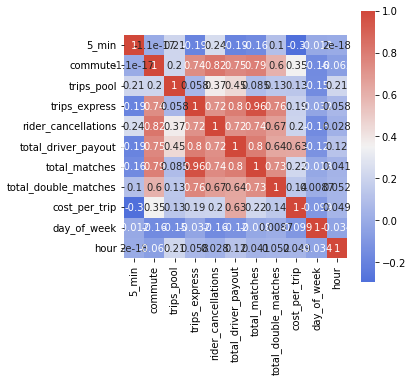

In [3]:
# correlation heatmap
corr = uber.corr()
cmap = sns.diverging_palette(260, 15, as_cmap=True)
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(corr, annot = True,cmap=cmap, square = True)

Here we can see that: 
- 5 minute wait times (treat) was not heavily correlated with cancellations, payout, or any variables at all. Cost per trip negative correlation is the most significant result here and means that the drivers are paid less and costs are lower while the experiment was on. The correlation of 0.3 signals only a weak link between these variables.
- Another insight is that Express trips were not directly correlated with the amount of POOL trips at all
- Commute hours significantly correlates with amount of trips and payouts and consequently ride matching correlates significanlty with costs and number of rides.
Next we determine if dividing the data can give us some more insight and 
first we analyse if 5 minute wait times cause more rider cancellations which signal negative customer feedback:

2 min wait time cancellation median amount: 160.0
5 min wait time cancellation median amount: 173.0
% change: 8.125000000000004 %


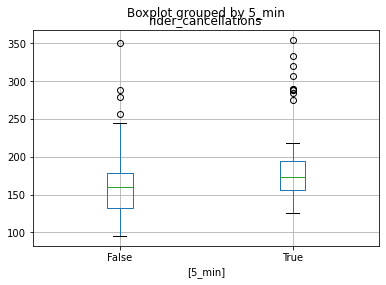

In [4]:
data = uber.loc[:,['5_min','rider_cancellations']]
boxplot = data.boxplot(by='5_min')

n1=data.loc[uber['5_min'] == False]['rider_cancellations'].median()
n2=data.loc[uber['5_min'] == True]['rider_cancellations'].median()
print("2 min wait time cancellation median amount:", n1)
print("5 min wait time cancellation median amount:", n2)
print("% change:", (n2/n1-1)*100,'%')

- Here we can see that the 5 min treatment increased rider cancellations median by 8 %. This does not seem excessive considering the wait time has more than doubled.
- Additonally, rider cancellations were more narrower and closer to the median in 5 minute experiment. It may be a result of people who are insensitive to delays skip this option altogether when they have to wait 5 min upfront. However, the likelihood of cancelling overall increases when 5 minute wait is introduced. 

Now let's see how people flock to Pool when Express product had 5 min waiting time. Next we take a look if number of trips data can be intepreted to take daily fluctuations into consideration. We determine how the trip numbers react to the 5 min switchback experiment when day of week and hour is controlled.  First we take a look how the product trips are affected during rush-hours (where 'commute' variable is True):


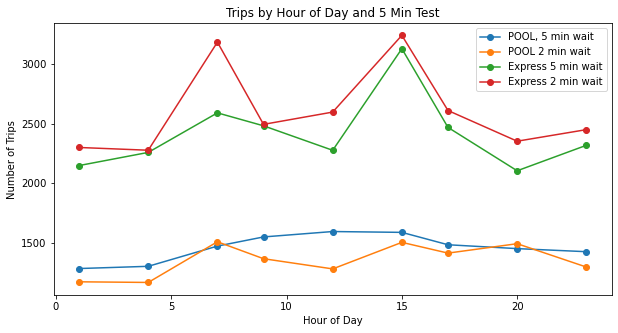

In [5]:
# ChatGPT tasked to generate code and, modified and verified by me by snippeting calculating first data points manually 
#(AI prompt found in appendix)  

import matplotlib.pyplot as plt

# Get data for pool and express services
pool_data = uber[['hour', 'trips_pool']]
express_data = uber[['hour', 'trips_express']]

# Get data for when 5_min was true and when it was false for both services
pool_5min_true = pool_data[uber['5_min'] == True]
pool_5min_false = pool_data[uber['5_min'] == False]

express_5min_true = express_data[uber['5_min'] == True]
express_5min_false = express_data[uber['5_min'] == False]

# Calculate the average for each hour
pool_5min_true_avg = pool_5min_true.groupby('hour').mean()
pool_5min_false_avg = pool_5min_false.groupby('hour').mean()
express_5min_true_avg = express_5min_true.groupby('hour').mean()
express_5min_false_avg = express_5min_false.groupby('hour').mean()

# Plot lines for each service
plt.subplots(1, 1, figsize=(10, 5))
plt.plot(pool_5min_true_avg.index, pool_5min_true_avg['trips_pool'], label='POOL, 5 min wait',marker='o')
plt.plot(pool_5min_false_avg.index, pool_5min_false_avg['trips_pool'], label='POOL 2 min wait',marker='o')
plt.plot(express_5min_true_avg.index, express_5min_true_avg['trips_express'], label='Express 5 min wait',marker='o')
plt.plot(express_5min_false_avg.index, express_5min_false_avg['trips_express'], label='Express 2 min wait',marker='o')

# Set plot title and labels
plt.title('Trips by Hour of Day and 5 Min Test')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend()
plt.show()

On rush-hours the 5 min experiment decreased Express usage by couple of hundreds of trips and only about one third of it changed to Pool product to skip waiting. This can be intepreted that more customers opt for the Pool product during afternoon rush-hour but in the morning rush-hour customers find ways to commute outside Uber.

Now let's separate weekends from weekdays if we see any patterns.

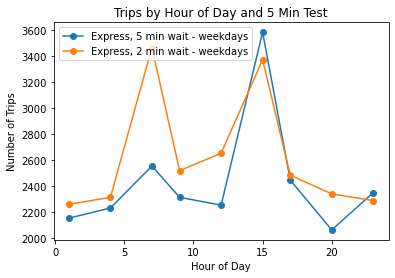

weekday experiment data points:  45


In [6]:
# Get data for express services only
express_data = uber[['hour', 'trips_express', '5_min']]

# Separate data for weekdays and weekends
express_weekdays = express_data[uber['day_of_week'] <= 4]
express_weekends = express_data[uber['day_of_week'] >= 5]

# Get data for when 5_min was true and when it was false for both weekdays and weekends
express_5min_true_weekdays = express_weekdays[express_weekdays['5_min'] == True]
express_5min_false_weekdays = express_weekdays[express_weekdays['5_min'] == False]

express_5min_true_weekends = express_weekends[express_weekends['5_min'] == True]
express_5min_false_weekends = express_weekends[express_weekends['5_min'] == False]

# Calculate the average for each hour for weekdays and weekends
express_5min_true_weekdays_avg = express_5min_true_weekdays.groupby('hour').mean()
express_5min_false_weekdays_avg = express_5min_false_weekdays.groupby('hour').mean()
express_5min_true_weekends_avg = express_5min_true_weekends.groupby('hour').mean()
express_5min_false_weekends_avg = express_5min_false_weekends.groupby('hour').mean()

# Plot lines for each service for weekdays and weekends
plt.plot(express_5min_true_weekdays_avg.index, express_5min_true_weekdays_avg['trips_express'], label='Express, 5 min wait - weekdays',marker='o')
plt.plot(express_5min_false_weekdays_avg.index, express_5min_false_weekdays_avg['trips_express'], label='Express, 2 min wait - weekdays',marker='o')


# Set plot title and labels
plt.title('Trips by Hour of Day and 5 Min Test')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend()
plt.show()
print("weekday experiment data points: ", len(express_5min_true_weekdays.index))

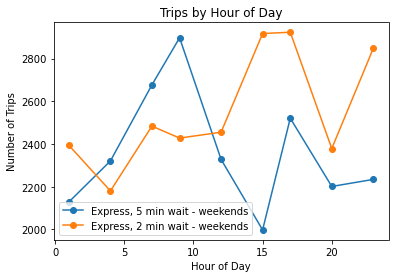

weekend experiment data points:  18


In [7]:
plt.plot(express_5min_true_weekends_avg.index, express_5min_true_weekends_avg['trips_express'], label='Express, 5 min wait - weekends',marker='o')
plt.plot(express_5min_false_weekends_avg.index, express_5min_false_weekends_avg['trips_express'], label='Express, 2 min wait - weekends',marker='o')

# Set plot title and labels
plt.title('Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend()
plt.show()
print("weekend experiment data points: ", len(express_5min_true_weekends.index))


On weekdays express data is logical and more people use it when wait time is 2 minutes. Most significant point is that one third of customers flee Express on the morning rush hour, i.e. when traveling to work. Here the afternoon rush hour peak is also evident and people seem to want to go home from work even if it the ride is less convenient.

It seems that on weekend mornings people do more trips when 5 minute wait is active. This seems strange, but can be credited to limited data point number of 18. 


We further analyse the statistic of changes to different products by controlling both weekday and the time of day:

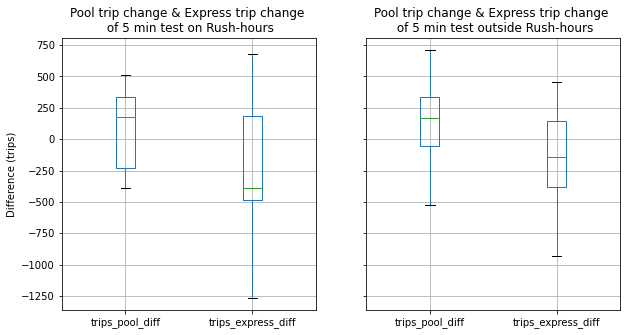

,day_of_week,hour,trips_pool_diff,trips_express_diff
5_min,,,,
commute,,,,
2,Monday,7,324.0,-483.0
5,Monday,15,510.0,679.0
11,Tuesday,7,342.0,-1261.0
14,Tuesday,15,-391.0,348.0
20,Wednesday,7,-314.0,-300.0
23,Wednesday,15,25.5,-480.5


In [8]:
# ChatGPT tasked to generate original code and, modified and verified by me

uber['day_of_week'] = uber['period_start'].dt.dayofweek
uber['hour'] = uber['period_start'].dt.hour

# Group by day of week, hour, 5_min, and commute, and compute mean trips for each group
grouped = uber.groupby(['day_of_week', 'hour', '5_min', 'commute']).mean()[['trips_pool', 'trips_express']].reset_index()
# Pivot table to compare trips data between 5_min=True and 5_min=False, when commute is true in both cases
pivoted = grouped.pivot_table(index=['day_of_week', 'hour'], columns=['5_min', 'commute'], values=['trips_pool', 'trips_express'])
# Compute unit difference between trips data when both 5_min and commute are true, and when 5_min is false and commute is true
diff = ((pivoted['trips_pool'][(True, True)] - pivoted['trips_pool'][(False, True)]))
pivoted['trips_pool_diff'] = diff
diff = ((pivoted['trips_express'][(True, True)] - pivoted['trips_express'][(False, True)]))
pivoted['trips_express_diff'] = diff

# Reset index and select desired columns
result = pivoted.reset_index()[['day_of_week', 'hour', 'trips_pool_diff', 'trips_express_diff']]

# Map day_of_week to weekday strings for readability
weekday_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
result['day_of_week'] = result['day_of_week'].map(weekday_dict)

result = result.dropna() # Experiment was not conducted for every similar weekday and hour

# Same for outside rush hour:
# Compute unit difference between trips data when both 5_min is true and commute is false, and when 5_min is false and commute is false
diff = ((pivoted['trips_pool'][(True, False)] - pivoted['trips_pool'][(False, False)]))
pivoted['trips_pool_diff'] = diff
diff = ((pivoted['trips_express'][(True, False)] - pivoted['trips_express'][(False, False)]))
pivoted['trips_express_diff'] = diff

# Reset index and select desired columns
result2 = pivoted.reset_index()[['day_of_week', 'hour', 'trips_pool_diff', 'trips_express_diff']]
result2['day_of_week'] = result2['day_of_week'].map(weekday_dict)
result2 = result2.dropna() # Experiment was not conducted for every similar weekday and hour

# draw plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
result.boxplot(column=['trips_pool_diff', 'trips_express_diff'], ax=ax[0])
result2.boxplot(column=['trips_pool_diff', 'trips_express_diff'], ax=ax[1])
ax[0].set_title('Pool trip change & Express trip change \n of 5 min test on Rush-hours')
ax[1].set_title('Pool trip change & Express trip change \n of 5 min test outside Rush-hours')
ax[0].set_ylabel('Difference (trips)')
plt.show()
result

Here we can conclude that when correcting the week day and hour, on average the Pool usage increased and Express usage decreased (but less than Pool increased) due to the 5 min test being in place. However, the test data is rather insufficient since for every weekday and hour combination there is only one comparison and the change can be attributed to external reasons other than the test being in place.

Outside rush-hours, the trips reduced in express seem to increae Pool trips by the same amount.

However, this data is extremely scarce as it contains only 6 data points to draw conclusions on. More data would be needed to determine if mondays, for example, allow for less waiting and crammed Express rides. 


Next we inspect cost per trip data which was said to be signicantly reduced in the case file.

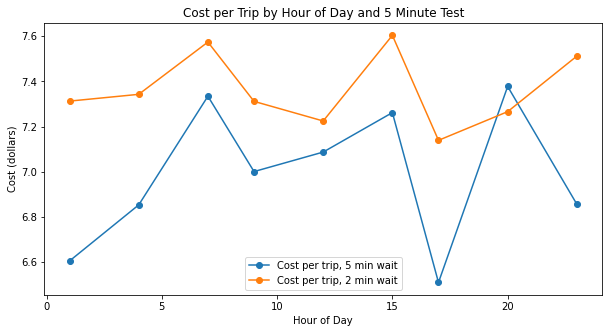

In [9]:


# Get data for pool and express services
costpertrip_data = uber[['hour', 'cost_per_trip']]

# Get data for when 5_min was true and when it was false for both services
cost_5min_true = costpertrip_data[uber['5_min'] == True]
cost_5min_false = costpertrip_data[uber['5_min'] == False]

# Calculate the average for each hour
cost_5min_true_avg = cost_5min_true.groupby('hour').mean()
cost_5min_false_avg = cost_5min_false.groupby('hour').mean()
cost_5min_true_avg
#pool_5min_true_avg.index
# Plot lines for each service
plt.subplots(1, 1, figsize=(10, 5))
plt.plot(cost_5min_true_avg.index, cost_5min_true_avg['cost_per_trip'], label='Cost per trip, 5 min wait',marker='o')
plt.plot(cost_5min_false_avg.index, cost_5min_false_avg['cost_per_trip'], label='Cost per trip, 2 min wait',marker='o')

# Set plot title and labels
plt.title('Cost per Trip by Hour of Day and 5 Minute Test')
plt.xlabel('Hour of Day')
plt.ylabel('Cost (dollars)')
plt.legend()
plt.show()

During afternoon rush-hour and late nights, the cost savings are significant, and the median savings is around 0.7 dollars per trip, which is multiple times the savings at other times. Interestingly the morning rush hour does not seem to have cost savings of the afternoon rush hour.

Interestingly, cost per trip is the lowest one time interval after the 15:00 starting rush-hour. However, the costs at all points of the day seem to be lower, indicating that cost-wise it is most rational to utilize the 5 minute wait option.

To conclude, the most important consequences of longer wait times are around 10 % lower costs by needing less drivers for same amount of rides, decrease in Express product trips during morning rush-hour and the fact that customers are not very willing to cancel their ordered trips.



\pagebreak
<h3> 3. Decision making </h3>


Based on the data analysis, Uber should increase the waiting time on weekdays in other cities as well to decrease costs. However, there is not enough weekly data to say what is the effect on weekend trip data, since the experiment has lasted under one month. More data points need to be generated to determine whether higher waiting time significantly decreases the usage of service.

On weekends, people could value the convenience of their ride more and might favor other alternatives in their free time trips. By not lowering the wait times on weekends, Uber gets the chance to perform testing on increasing the weekend wait times and to determine if the cost-savings outweight the revenue loss. The current data is not enough to risk weekends use which could dramatically differ from weekday use.

Moreover, the loss on perceived quality should not be given too much weight. By differentiating the Express product as low-cost and lower convenience, Uber can generate options for people and earn higher revenues from the more expensive products. Private uberX can cost as over twice as much of a pooled service and the price should reflect the additional cost of riding alone (ridesharingdriver.com, 2022). Since drivers can offer multiple Uber product types, the same driver can pick up private uberX customer and exit the "pool driver pool" for the duration of that customer's ride. 

One way of optimizing the customer experience is dynamically scaling the maximum wait time according to time of day and the day of the week. For example, the data indicates that on morning rush hour when people travel to work, implementing 5 minute wait times reduces Express product usage by one third as people are in hurry. By scaling this time on weekdays to be a maximum of 2 minutes wait time, uber could reach more revenue and profit even after considering the cost savings of more full rides.

To summarize, Uber should introduce 5 minute waiting times for its Express productfor weekdays in all treatment cities. The monitoring should be constant and local variations to the model should be considered over the short term. This opportunity presents a way for Uber to increase its troubling profits and further diversify its product range near low-end rides.


\pagebreak
<h3> Appendix </h3>


In [10]:
# Verifying chatgpt code  data
uber['day_of_week']= uber['period_start'].dt.dayofweek # 0 represents Monday and 6 Sunday for example

monday_7am = uber[(uber['period_start'].dt.dayofweek == 0) & (uber['period_start'].dt.hour == 7)]

monday_7am


,period_start,5_min,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches,cost_per_trip,day_of_week,hour
0,2018-02-19 07:00:00,False,True,1415,3245,256,34458.41163,3372,1476,7.394509,0,7
63,2018-02-26 07:00:00,True,True,1739,2762,289,38010.24558,3112,1391,8.444845,0,7


\pagebreak
<h3> References </h3>

https://www.ridesharingdriver.com/whats-uberpool-shared-ride-cheaper-than-other-uber-services/


<h3> ChatGPT prompts: </h3>

"Dataframe (call it uber) which contains columns "trips_pool" and "trips_express" and boolean column "5_min". Now write code that compares the trips data on same weekdays and same hour times and outputs a dataframe where the  difference of trips_pool and trips_express is shown compared between when value of 5_min is true or false. Map days of week strings to the place of integers"

</ln>


